In [1]:
import pickle
import pandas as pd
from sklearn import tree

model = pickle.load(open("data/dtree.model.sav", "rb"))
features = (
    pd.read_csv("data/density_train.csv", sep=";", decimal=",")
    .drop(["Density"], axis=1)
    .columns.values.tolist()
)

rules = tree.export_text(model, feature_names=features)
print(rules)

|--- Al2O3 <= 0.18
|   |--- TiO2 <= 0.18
|   |   |--- T <= 32.50
|   |   |   |--- TiO2 <= 0.03
|   |   |   |   |--- Al2O3 <= 0.03
|   |   |   |   |   |--- T <= 22.50
|   |   |   |   |   |   |--- value: [1.06]
|   |   |   |   |   |--- T >  22.50
|   |   |   |   |   |   |--- value: [1.06]
|   |   |   |   |--- Al2O3 >  0.03
|   |   |   |   |   |--- value: [1.09]
|   |   |   |--- TiO2 >  0.03
|   |   |   |   |--- T <= 27.50
|   |   |   |   |   |--- T <= 22.50
|   |   |   |   |   |   |--- value: [1.09]
|   |   |   |   |   |--- T >  22.50
|   |   |   |   |   |   |--- value: [1.09]
|   |   |   |   |--- T >  27.50
|   |   |   |   |   |--- value: [1.08]
|   |   |--- T >  32.50
|   |   |   |--- TiO2 <= 0.03
|   |   |   |   |--- Al2O3 <= 0.03
|   |   |   |   |   |--- T <= 55.00
|   |   |   |   |   |   |--- T <= 47.50
|   |   |   |   |   |   |   |--- value: [1.05]
|   |   |   |   |   |   |--- T >  47.50
|   |   |   |   |   |   |   |--- value: [1.04]
|   |   |   |   |   |--- T >  55.00
|   |   |   

In [2]:
from src.rules import get_rules


rules = get_rules(model, features)
display(len(rules))
rules

34

[if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (T > 55.0) and (T > 62.5) -> 1.033,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (T > 55.0) and (T <= 62.5) -> 1.038,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (T <= 55.0) and (T > 47.5) -> 1.045,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (TiO2 <= 0.025) and (Al2O3 <= 0.025) and (T <= 55.0) and (T <= 47.5) -> 1.051,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (TiO2 <= 0.025) and (Al2O3 > 0.025) and (T > 60.0) and (T > 67.5) -> 1.053,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (TiO2 > 0.025) and (T > 50.0) and (T > 67.5) -> 1.056,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (TiO2 <= 0.025) and (Al2O3 > 0.025) and (T > 60.0) and (T <= 67.5) -> 1.057,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) and

In [3]:
from src.rules import normalise_rules


rules = normalise_rules(rules)
display(len(rules))
rules

34

[if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) -> 1.033,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 62.5) -> 1.038,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 55.0) -> 1.045,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 55.0) -> 1.051,
 if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (TiO2 <= 0.175) and (T > 32.5) -> 1.053,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T > 32.5) -> 1.056,
 if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 67.5) -> 1.057,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) and (T > 22.5) -> 1.06,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T > 32.5) and (T <= 67.5) -> 1.06,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) -> 1.062,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T > 32.5) and (T <= 67.5) -> 1.064,
 if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (TiO2 <= 0.175) and (

In [4]:
from src.rules import delete_same_rules


rules = delete_same_rules(rules)
display(len(rules))
rules

24

[if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) -> 1.033,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 62.5) -> 1.038,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 55.0) -> 1.048,
 if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (TiO2 <= 0.175) and (T > 32.5) -> 1.053,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T > 32.5) -> 1.056,
 if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 67.5) -> 1.057,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) and (T > 22.5) -> 1.06,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) -> 1.062,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T > 32.5) and (T <= 67.5) -> 1.062,
 if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 60.0) -> 1.067,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T > 32.5) and (T <= 50.0) -> 1.079,
 if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and 

In [5]:
from src.rules import get_features, vectorize_rules

features = get_features(rules, ["T"])
print(features)

df_rules = vectorize_rules(rules, features)
df_rules.head(5)

['(Al2O3 <= 0.175)', '(Al2O3 > 0.025)', '(Al2O3 > 0.175)', '(TiO2 <= 0.175)', '(TiO2 > 0.025)', '(TiO2 > 0.175)']


(Al2O3 <= 0.175)  \
rule                                                                  
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...                1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...                1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...                1   
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...                1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...                1   

                                                   (Al2O3 > 0.025)  \
rule                                                                 
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               0   
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...               1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...               0   

                                                   (Al2O3 > 0.175)  \
rule                                                                 
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               0   
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...               0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...               0   

                                                   (TiO2 <= 0.175)  \
rule                                                                 
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...               1   
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...               1   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...               1   

                                                   (TiO2 > 0.025)  \
rule                                                                
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...              0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...              0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...              0   
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...              0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...              1   

                                                   (TiO2 > 0.175)  \
rule                                                                
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...              0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...              0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...              0   
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...              0   
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...              0   

                                                            consequent  
rule                                                                    
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...  1.0333299999999999  
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...             1.03826  
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T ...  1.0478999999999998  
if (Al2O3 <= 0.175) and (Al2O3 > 0.025) and (Ti...             1.05291  
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (Ti...             1.05601

c:\Users\user\Projects\python\fuzzy\.venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\Projects\python\fuzzy\.venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\Projects\python\fuzzy\.venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)
c:\Users\user\Projects\python\fuzzy\.venv\Lib\site-packages\sklearn\base.py:1473: ConvergenceWarning: Number of distinct clusters (5) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  return fit_method(esti

{2: 0.5483575964237912,
 3: 0.602943554055511,
 4: 0.8221763769597347,
 5: 1.0,
 6: 1.0,
 7: 1.0,
 8: 1.0,
 9: 1.0,
 10: 1.0}

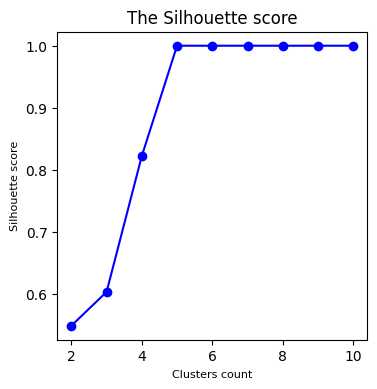

'The best clusters count is 5'

In [6]:
from src.cluster_helper import draw_best_clusters_plot, get_best_clusters_num

random_state = 9

X = df_rules.copy()
X = X.drop(["consequent"], axis=1)

clusters_score = get_best_clusters_num(X, random_state)
display(clusters_score)

draw_best_clusters_plot(clusters_score)

clusters_num = sorted(clusters_score.items(), key=lambda x: x[1], reverse=True)[0][0]
display(f"The best clusters count is {clusters_num}")

In [7]:
from sklearn import cluster

from src.cluster_helper import print_cluster_result

kmeans = cluster.KMeans(n_clusters=clusters_num, random_state=random_state)
kmeans.fit(X)

print_cluster_result(X, clusters_num, kmeans.labels_)

Кластер 1 (5):
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) -> 1.033;
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 62.5) -> 1.038;
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T > 32.5) and (T <= 55.0) -> 1.048;
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) and (T > 22.5) -> 1.06;
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (T <= 32.5) -> 1.062
--------
Кластер 2 (5):
if (Al2O3 > 0.175) and (T > 35.0) -> 1.144;
if (Al2O3 > 0.175) and (T > 35.0) and (T <= 65.0) -> 1.155;
if (Al2O3 > 0.175) and (T > 35.0) and (T <= 52.5) -> 1.166;
if (Al2O3 > 0.175) and (T <= 35.0) and (T > 22.5) -> 1.182;
if (Al2O3 > 0.175) and (T <= 35.0) -> 1.189
--------
Кластер 3 (6):
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T > 32.5) -> 1.056;
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T > 32.5) and (T <= 67.5) -> 1.062;
if (Al2O3 <= 0.175) and (TiO2 <= 0.175) and (TiO2 > 0.025) and (T > 32.5) and (T <= 50.0) -> 1.079;
if (Al2O3 <= 

In [8]:
density_train = pd.read_csv("data/density_train.csv", sep=";", decimal=",")
density_test = pd.read_csv("data/density_test.csv", sep=";", decimal=",")

display(density_train.head(3))
display(density_test.head(3))

T  Al2O3  TiO2  Density
0  20    0.0   0.0  1.06250
1  25    0.0   0.0  1.05979
2  35    0.0   0.0  1.05404

T  Al2O3  TiO2  Density
0  30   0.00   0.0  1.05696
1  55   0.00   0.0  1.04158
2  25   0.05   0.0  1.08438

In [9]:
from src.rules import simplify_and_group_rules

clustered_rules = simplify_and_group_rules(density_train, rules, clusters_num, kmeans.labels_)
clustered_rules

[[if (Al2O3 = 0.0) and (TiO2 = 0.0) and (T = 70) -> 1.033,
  if (Al2O3 = 0.0) and (TiO2 = 0.0) and (T = 47.5) -> 1.038,
  if (Al2O3 = 0.0) and (TiO2 = 0.0) and (T = 43.75) -> 1.048,
  if (Al2O3 = 0.0) and (TiO2 = 0.0) and (T = 27.5) -> 1.06,
  if (Al2O3 = 0.0) and (TiO2 = 0.0) and (T = 20) -> 1.062],
 [if (Al2O3 = 0.3) and (T = 70) -> 1.144,
  if (Al2O3 = 0.3) and (T = 50.0) -> 1.155,
  if (Al2O3 = 0.3) and (T = 43.75) -> 1.166,
  if (Al2O3 = 0.3) and (T = 28.75) -> 1.182,
  if (Al2O3 = 0.3) and (T = 20) -> 1.189],
 [if (Al2O3 = 0.0) and (TiO2 = 0.1) and (T = 70) -> 1.056,
  if (Al2O3 = 0.0) and (TiO2 = 0.1) and (T = 50.0) -> 1.062,
  if (Al2O3 = 0.0) and (TiO2 = 0.1) and (T = 41.25) -> 1.079,
  if (Al2O3 = 0.0) and (TiO2 = 0.1) and (T = 30.0) -> 1.084,
  if (Al2O3 = 0.0) and (TiO2 = 0.1) and (T = 27.5) -> 1.088,
  if (Al2O3 = 0.0) and (TiO2 = 0.1) and (T = 20) -> 1.091],
 [if (Al2O3 = 0.0) and (TiO2 = 0.3) and (T = 70) -> 1.178,
  if (Al2O3 = 0.0) and (TiO2 = 0.3) and (T = 50.0) -> 1.

c:\Users\user\Projects\python\fuzzy\.venv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


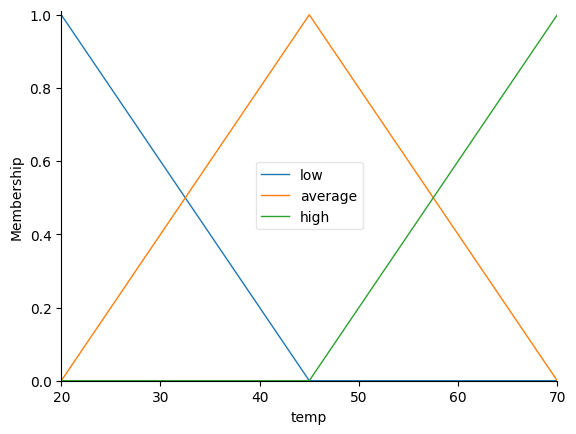

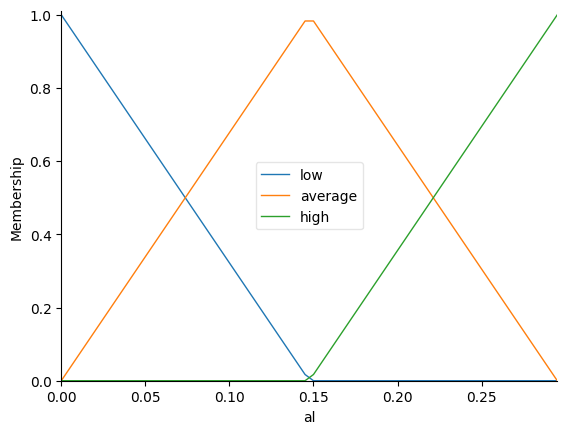

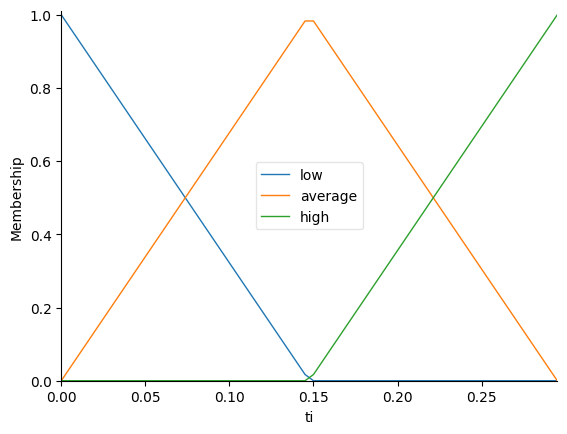

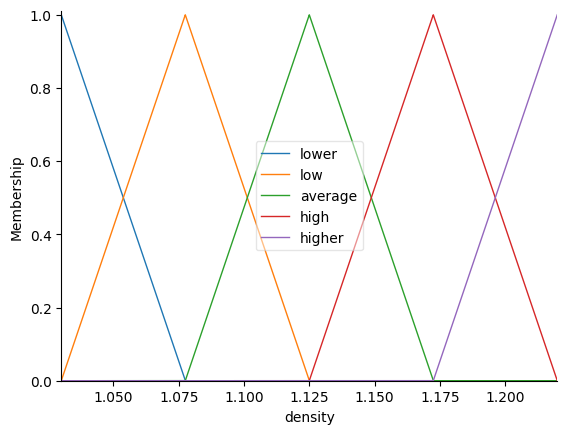

In [10]:
import numpy as np
from skfuzzy import control as ctrl
import skfuzzy as fuzz

temp = ctrl.Antecedent(density_train["T"].sort_values().unique(), "temp")
al = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "al")
ti = ctrl.Antecedent(np.arange(0, 0.3, 0.005), "ti")
density = ctrl.Consequent(np.arange(1.03, 1.22, 0.00001), "density")

temp.automf(3, variable_type="quant")
temp.view()
al.automf(3, variable_type="quant")
al.view()
ti.automf(3, variable_type="quant")
ti.view()
density.automf(5, variable_type="quant")
density.view()

In [11]:
from src.rules import  get_fuzzy_rules

fuzzy_variables = {"Al2O3": al, "TiO2": ti, "T": temp, "consequent": density}
fuzzy_rules = get_fuzzy_rules(clustered_rules, fuzzy_variables)

fuzzy_cntrl = ctrl.ControlSystem(fuzzy_rules)

sim = ctrl.ControlSystemSimulation(fuzzy_cntrl, lenient=False)

display(len(fuzzy_rules))
fuzzy_rules

15

[IF (al[low] AND ti[low]) AND temp[high] THEN density[lower]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (al[low] AND ti[low]) AND temp[average] THEN density[lower]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (al[low] AND ti[low]) AND temp[low] THEN density[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF al[high] AND temp[high] THEN density[average]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF al[high] AND temp[average] THEN density[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF al[high] AND temp[low] THEN density[high]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (al[low] AND ti[average]) AND temp[high] THEN density[low]
 	AND aggregation function : fmin
 	OR aggregation function  : fmax,
 IF (al[low] AND ti[average]) AND temp[average] THEN density[low]
 	AND aggregation function : fmin
 	OR aggregation function

In [12]:
sim.input["temp"] = 20
sim.input["al"] = 0.0
sim.input["ti"] = 0.0
sim.compute()
sim.print_state()
display(sim.output["density"])

 Antecedents 
Antecedent: al                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0
Antecedent: ti                      = 0.0
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0
Antecedent: temp                    = 20
  - low                             : 1.0
  - average                         : 0.0
  - high                            : 0.0

 Rules 
RULE #0:
  IF (al[low] AND ti[low]) AND temp[high] THEN density[lower]
	AND aggregation function : fmin
	OR aggregation function  : fmax

  Aggregation (IF-clause):
  - al[low]                                                : 1.0
  - ti[low]                                                : 1.0
  - temp[high]                                             : 0.0
                      (al[low] AND ti[low]) AND temp[high] = 0.0
  Activation (THEN-clause):
                     

np.float64(1.0774975002635008)

In [13]:
def fuzzy_pred(row):
    sim.input["temp"] = row["T"]
    sim.input["al"] = row["Al2O3"]
    sim.input["ti"] = row["TiO2"]
    sim.compute()
    return sim.output["density"]

result_train = density_train.copy()
result_train["DensityPred"] = result_train.apply(fuzzy_pred, axis=1)
result_train.head(15)

T  Al2O3  TiO2  Density  DensityPred
0   20   0.00   0.0  1.06250     1.077498
1   25   0.00   0.0  1.05979     1.076593
2   35   0.00   0.0  1.05404     1.069156
3   40   0.00   0.0  1.05103     1.061106
4   45   0.00   0.0  1.04794     1.045833
5   50   0.00   0.0  1.04477     1.046360
6   60   0.00   0.0  1.03826     1.047642
7   65   0.00   0.0  1.03484     1.046360
8   70   0.00   0.0  1.03182     1.045833
9   20   0.05   0.0  1.08755     1.077498
10  45   0.05   0.0  1.07105     1.067145
11  50   0.05   0.0  1.06760     1.067145
12  55   0.05   0.0  1.06409     1.067988
13  65   0.05   0.0  1.05691     1.062538
14  70   0.05   0.0  1.05291     1.047191

In [14]:
result_test = density_test.copy()
result_test["DensityPred"] = result_test.apply(fuzzy_pred, axis=1)
result_test

T  Al2O3  TiO2  Density  DensityPred
0   30   0.00  0.00  1.05696     1.073918
1   55   0.00  0.00  1.04158     1.047642
2   25   0.05  0.00  1.08438     1.076518
3   30   0.05  0.00  1.08112     1.073918
4   35   0.05  0.00  1.07781     1.069156
5   40   0.05  0.00  1.07446     1.067145
6   60   0.05  0.00  1.06053     1.067988
7   35   0.30  0.00  1.17459     1.172492
8   65   0.30  0.00  1.14812     1.136460
9   45   0.00  0.05  1.07424     1.067145
10  50   0.00  0.05  1.07075     1.067145
11  55   0.00  0.05  1.06721     1.067988
12  20   0.00  0.30  1.22417     1.204157
13  30   0.00  0.30  1.21310     1.202348
14  40   0.00  0.30  1.20265     1.203630
15  60   0.00  0.30  1.18265     1.176072
16  70   0.00  0.30  1.17261     1.172492

In [15]:
import math
from sklearn import metrics


rmetrics = {}
rmetrics["RMSE_train"] = math.sqrt(
    metrics.mean_squared_error(result_train["Density"], result_train["DensityPred"])
)
rmetrics["RMSE_test"] = math.sqrt(
    metrics.mean_squared_error(result_test["Density"], result_test["DensityPred"])
)
rmetrics["RMAE_test"] = math.sqrt(
    metrics.mean_absolute_error(result_test["Density"], result_test["DensityPred"])
)
rmetrics["R2_test"] = metrics.r2_score(
    result_test["Density"], result_test["DensityPred"]
)

rmetrics

{'RMSE_train': 0.009765373953597112,
 'RMSE_test': 0.009031443610368107,
 'RMAE_test': 0.08581225574298121,
 'R2_test': 0.978451748357252}